**1. Library Imports**

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from PIL import Image
from io import BytesIO
from matplotlib.colors import LinearSegmentedColormap

**2. Data Exploration**

In [9]:
dataset = 'datasets_house_prices.csv'
house_data = pd.read_csv(dataset)

print("Dataset Overview:")
print(house_data.head())

print("\nMissing Data:")
print(house_data.isnull().sum())

house_data.fillna(house_data.mean(), inplace=True)

Q1 = house_data.quantile(0.25)
Q3 = house_data.quantile(0.75)
IQR = Q3 - Q1
house_data = house_data[~((house_data < (Q1 - 1.5 * IQR)) | (house_data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nSummary Statistics:")
print(house_data.describe())

Dataset Overview:
   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05

Missing Data:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64

Summary Statistics:
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.54

**3. Data Visualization**

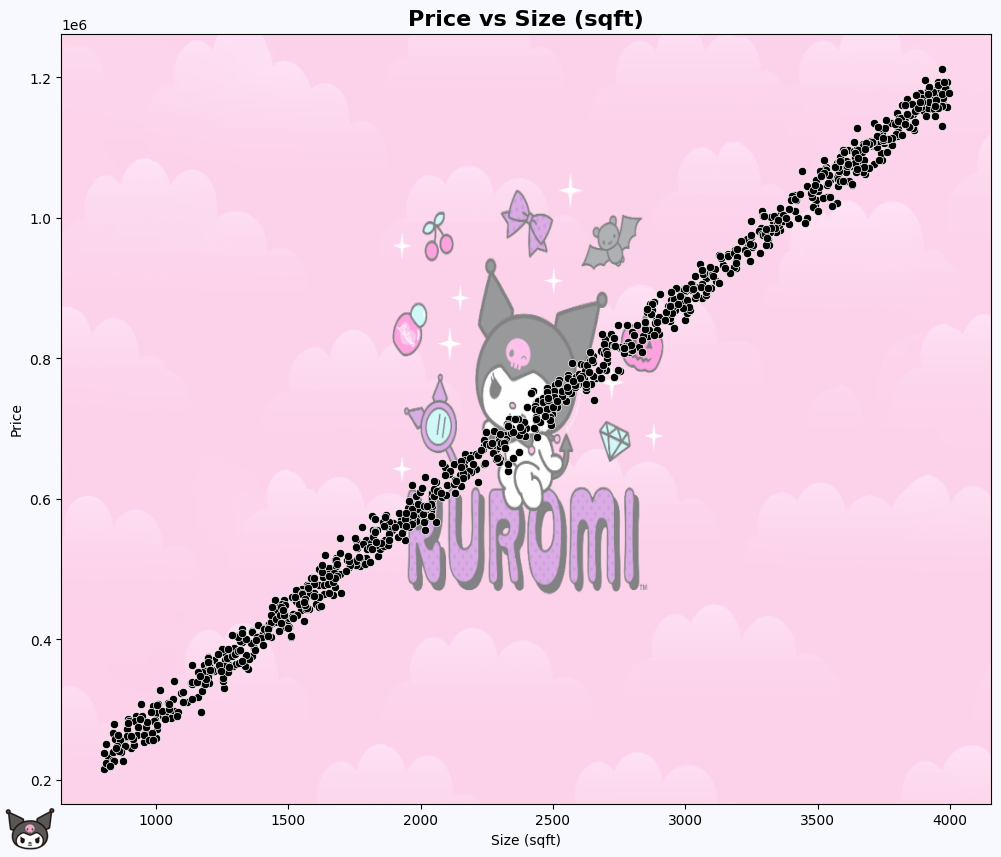

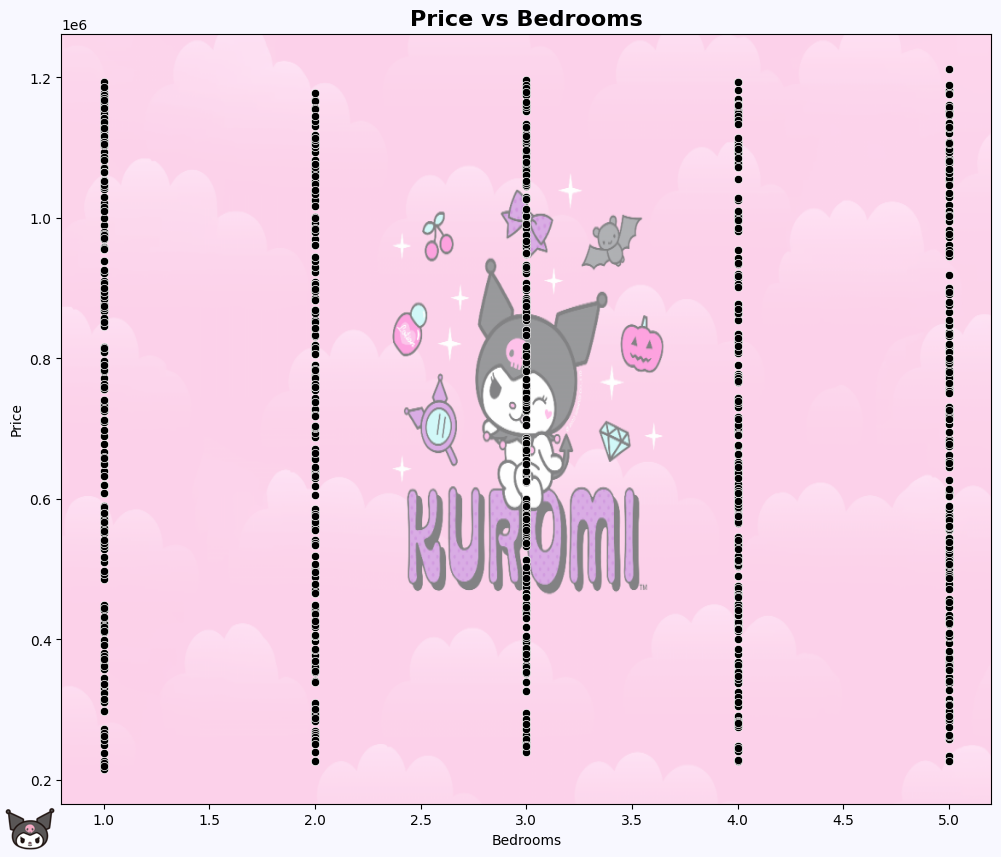

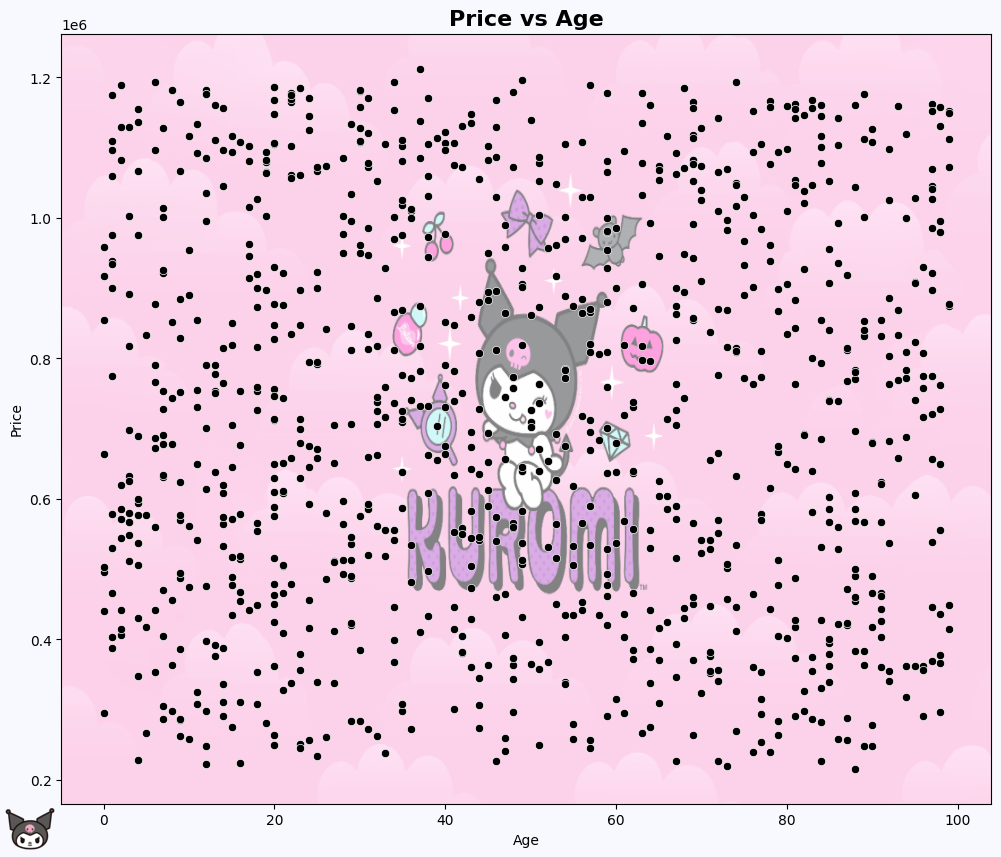

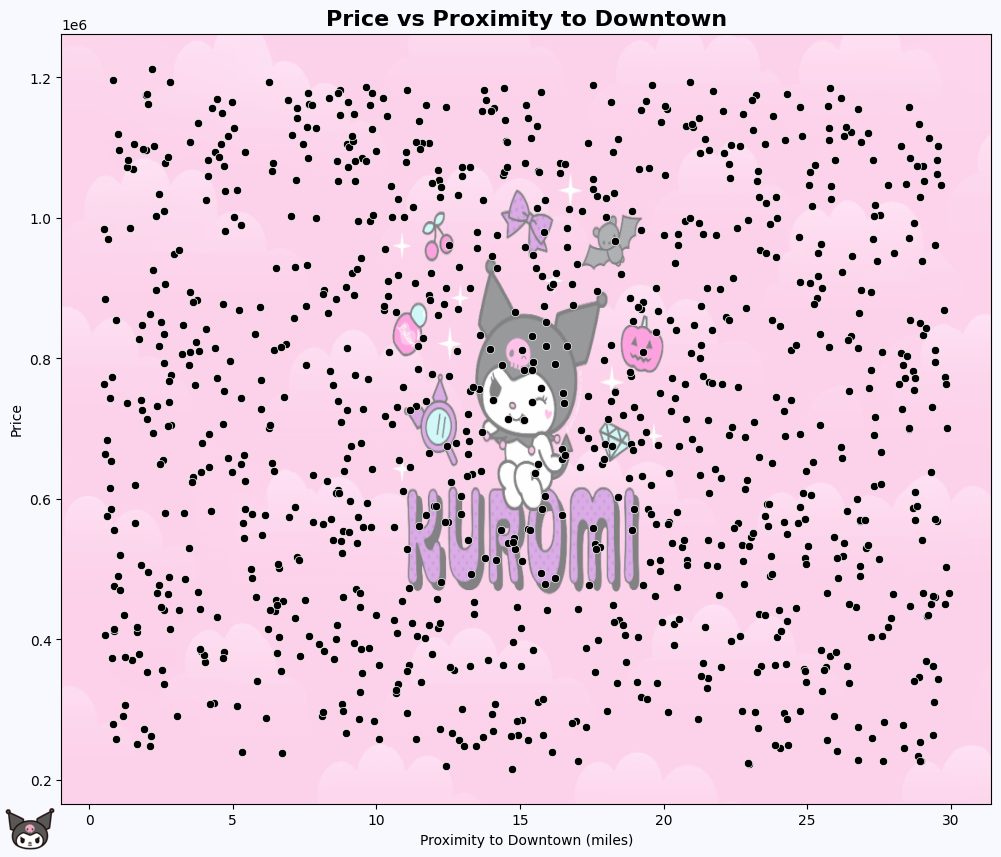

In [10]:
main_image_url = "https://i.postimg.cc/q7SkBDRt/20240528-152756.png"
sticker_image_url = "https://i.postimg.cc/DwQ3JyvS/kuromi.png"

plt.figure(figsize=(12, 10), facecolor='#f8f8ff')
ax = sns.scatterplot(x='Size (sqft)', y='Price', color='black', data=house_data)
plt.title('Price vs Size (sqft)', color='black', fontsize=16, fontweight='bold')

response = requests.get(main_image_url)
main_image = Image.open(BytesIO(response.content))

response = requests.get(sticker_image_url)
sticker_image = Image.open(BytesIO(response.content))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), alpha=0.7, aspect='auto')

sticker = sticker_image.resize((60, 60))
plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

plt.figure(figsize=(12, 10), facecolor='#f8f8ff')
ax = sns.scatterplot(x='Bedrooms', y='Price', color='black', data=house_data)
plt.title('Price vs Bedrooms', color='black', fontsize=16, fontweight='bold')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), alpha=0.7, aspect='auto')

sticker = sticker_image.resize((60, 60))
plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

plt.figure(figsize=(12, 10), facecolor='#f8f8ff')
ax = sns.scatterplot(x='Age', y='Price', color='black', data=house_data)
plt.title('Price vs Age', color='black', fontsize=16, fontweight='bold')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), alpha=0.7, aspect='auto')

sticker = sticker_image.resize((60, 60))
plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

plt.figure(figsize=(12, 10), facecolor='#f8f8ff')
ax = sns.scatterplot(x='Proximity to Downtown (miles)', y='Price', color='black', data=house_data)
plt.title('Price vs Proximity to Downtown', color='black', fontsize=16, fontweight='bold')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), alpha=0.7, aspect='auto')

sticker = sticker_image.resize((60, 60))
plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

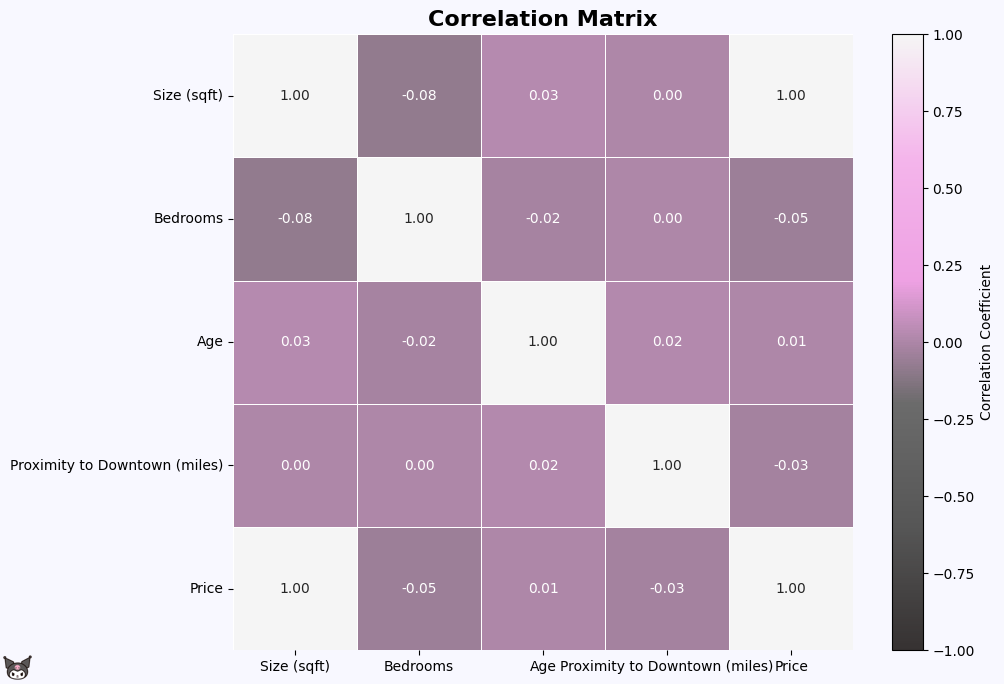

In [11]:
sticker_url = "https://i.postimg.cc/DwQ3JyvS/kuromi.png"
response = requests.get(sticker_url)
sticker_image = Image.open(BytesIO(response.content))

colors = ["#363232", "#565656", "#6b6b6b", "#eea1e3", "#f4b5eb", "#f5f5f5"]
cmap = LinearSegmentedColormap.from_list("kuromi_cmap", colors, N=256)

numeric_data = house_data.select_dtypes(include=['int64', 'float64'])

plt.figure(facecolor='#f8f8ff', figsize=(10, 8))

heatmap = sns.heatmap(numeric_data.corr(), annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, vmin=-1.0, vmax=1.0, cbar=False)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.colorbar(heatmap.collections[0]).set_label('Correlation Coefficient')

sticker = sticker_image.resize((35, 35))

plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

**4. Data Preprocessing**

In [12]:
X = house_data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = house_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of the standardized training data:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

First 5 rows of the standardized training data:
   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)
0     1.677660 -1.456677  1.737153                       0.045620
1     1.254519  1.403559 -0.577340                      -1.037343
2    -0.817483 -0.741618 -1.130055                      -1.465520
3    -1.143632 -0.026559  0.113553                      -0.051020
4     0.467926 -1.456677  0.389911                       1.465485


**5. Model Creation**

In [13]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

X_train_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_const).fit()

print(ols_model.summary())

y_pred = model.predict(X_test_scaled)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.332e+05
Date:                Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                        06:01:05   Log-Likelihood:                -7452.2
No. Observations:                 700   AIC:                         1.491e+04
Df Residuals:                     695   BIC:                         1.494e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.092e+05    385.696   1838.693      0.0

**6. Model Evaluation**

Mean Squared Error (MSE): 100214724.63
R-squared: 1.00
Adjusted R-squared: 1.00


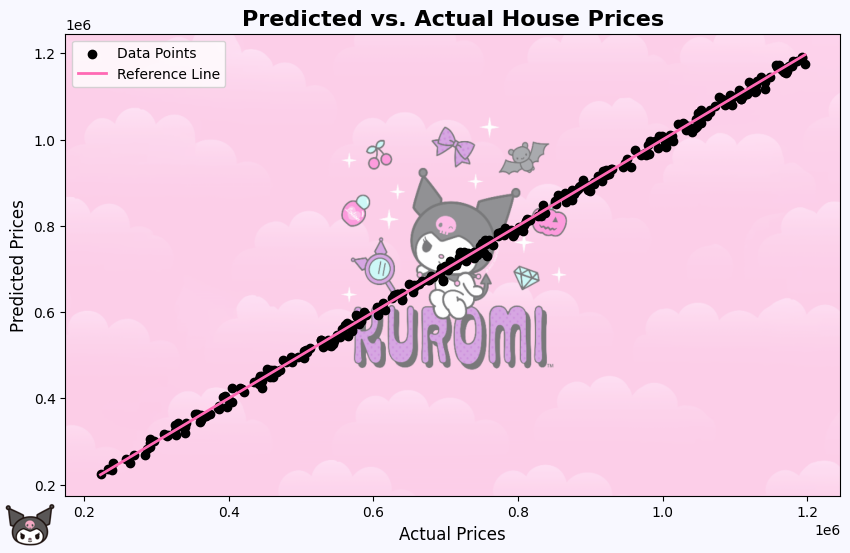

In [14]:
main_image_url = "https://i.postimg.cc/q7SkBDRt/20240528-152756.png"
sticker_image_url = "https://i.postimg.cc/DwQ3JyvS/kuromi.png"

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r_squared = r2_score(y_test, y_pred)
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

print(f"R-squared: {r_squared:.2f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.2f}")

plt.figure(facecolor='#f8f8ff', figsize=(10, 6))

plt.scatter(y_test, y_pred, color='black', label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='hotpink', linewidth=2, label='Reference Line')

response = requests.get(main_image_url)
main_image = Image.open(BytesIO(response.content))

response = requests.get(sticker_image_url)
sticker_image = Image.open(BytesIO(response.content))

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

plt.imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), alpha=0.75, aspect='auto')

sticker = sticker_image.resize((60, 60))

plt.figimage(sticker, xo=0, yo=0, zorder=10)

plt.title('Predicted vs. Actual House Prices', fontsize=16, fontweight='bold')
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)

plt.legend()

plt.show()